# Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import ml_help
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plot_label="Speed (km/h)"

# Load datasets

In [2]:
flow_df = pd.read_csv("./data/gardiner_flow.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
flow_df.head()

,collectedAt,month,day,day_of_week,hour,minute,currentSpeed
0,2022-07-14 12:45:00+00:00,July,14,Thursday,12,45,94
1,2022-07-14 12:51:44+00:00,July,14,Thursday,12,51,94
2,2022-07-14 12:55:27+00:00,July,14,Thursday,12,55,75
3,2022-07-14 13:00:00+00:00,July,14,Thursday,13,0,72
4,2022-07-14 13:05:00+00:00,July,14,Thursday,13,5,94


In [4]:
print(len(flow_df))
print(flow_df.collectedAt.min())
print(flow_df.collectedAt.max())

73535
2022-07-14 12:45:00+00:00
2023-03-26 21:55:00+00:00


In [5]:
weather_df.head()

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,...,day,day_of_week,day_of_week_name,hour,minute,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,45,0,1,0,0,0
1,10.0,2022-07-14 12:51:44+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,51,0,1,0,0,0
2,10.0,2022-07-14 12:55:27+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,...,14,3,Thursday,12,55,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,...,14,3,Thursday,13,0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,...,14,3,Thursday,13,5,0,1,0,0,0


In [6]:
print(len(weather_df))
print(weather_df.collectedAt.min())
print(weather_df.collectedAt.max())

73535
2022-07-14 12:45:00+00:00
2023-03-26 21:55:00+00:00


# Cast attribute collectedAt to date

In [7]:
flow_df["collectedAt"] = pd.to_datetime(flow_df["collectedAt"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

# Drop expanded date and time attributes
- Will merge the data sets by collectedAt first, then will expand again

In [8]:
flow_df.drop(['month', 'day', 'day_of_week', 'hour', 'minute'],inplace=True,axis=1)
flow_df.head()

,collectedAt,currentSpeed
0,2022-07-14 12:45:00,94
1,2022-07-14 12:51:44,94
2,2022-07-14 12:55:27,75
3,2022-07-14 13:00:00,72
4,2022-07-14 13:05:00,94


In [9]:
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute'],inplace=True,axis=1)
weather_df.head()

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00,18.69,18.68,79,2.57,340,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:44,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:27,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00,19.42,19.40,76,2.57,340,0,0.0,0.0,0,1,0,0,0


# Drop windDegree from weather_df

In [10]:
weather_df.drop("windDegree",inplace=True,axis=1)
weather_df.head()

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00,18.69,18.68,79,2.57,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:44,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:27,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00,19.38,19.36,76,2.57,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00,19.42,19.40,76,2.57,0,0.0,0.0,0,1,0,0,0


# Merge flow and weather dataframes

In [11]:
df = flow_df.merge(weather_df,on="collectedAt",how="inner")
df.head()

,collectedAt,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-21 04:50:00,94,10.0,23.93,24.55,83,1.79,25,0.0,0.0,1,0,0,0,0
1,2022-07-21 05:30:00,94,10.0,23.76,24.36,83,1.34,25,0.0,0.0,1,0,0,0,0
2,2022-07-21 05:10:00,94,10.0,23.89,24.50,83,1.79,25,0.0,0.0,1,0,0,0,0
3,2022-07-21 05:50:00,94,10.0,23.71,24.30,83,0.89,23,0.0,0.0,1,0,0,0,0
4,2022-07-21 04:55:00,94,10.0,23.89,24.50,83,1.79,25,0.0,0.0,1,0,0,0,0


# Plot correlations
- Between speed, visibility, temperature, humidity, wind speed, cloudiness and precipitation

In [12]:
data_to_correlate = df[["currentSpeed","visibility","temperature","humidity","windSpeed","cloudsAll","rain1h","snow1h"]]
corr_mat = data_to_correlate.corr()

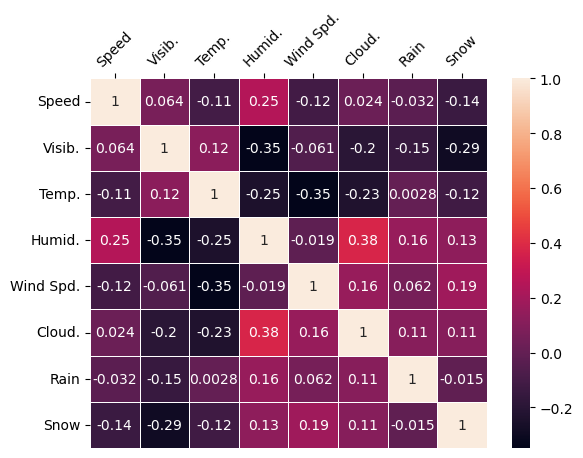

In [13]:
labels=["Speed", "Visib.", "Temp.", "Humid.", "Wind Spd.", "Cloud.", "Rain", "Snow"]

ax = sns.heatmap(corr_mat.to_numpy(),annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/041_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/041_correlations.png", bbox_inches="tight")

# Expand date and time
- Also remove collectedAt

In [14]:
df["month"] = df.collectedAt.dt.month
df["day_of_week"] = df.collectedAt.dt.weekday
df["day"] = df.collectedAt.dt.day
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,94,10.0,23.93,24.55,83,1.79,25,0.0,0.0,1,0,0,0,0,7,21,3,4,50
1,94,10.0,23.76,24.36,83,1.34,25,0.0,0.0,1,0,0,0,0,7,21,3,5,30
2,94,10.0,23.89,24.50,83,1.79,25,0.0,0.0,1,0,0,0,0,7,21,3,5,10
3,94,10.0,23.71,24.30,83,0.89,23,0.0,0.0,1,0,0,0,0,7,21,3,5,50
4,94,10.0,23.89,24.50,83,1.79,25,0.0,0.0,1,0,0,0,0,7,21,3,4,55


# Onehot encode categorical attributes
- Also cast all fields to float32

In [15]:
categorical_attrs = ["month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,94.0,10.0,23.930000,24.549999,83.0,1.79,25.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,94.0,10.0,23.760000,24.360001,83.0,1.34,25.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,94.0,10.0,23.889999,24.500000,83.0,1.79,25.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,94.0,10.0,23.709999,24.299999,83.0,0.89,23.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,94.0,10.0,23.889999,24.500000,83.0,1.79,25.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split data set into train and test

In [17]:
X = transformed_df.drop("currentSpeed",axis=1)
y = transformed_df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42)

# Run ML tasks

## Regression

### Linear Regression

Fitting model...
Fitting model... OK! Took 0.5711445808410645 seconds

model Linear Regression
r2 0.37169039249420166
mae 7.542865753173828
mse 103.21785736083984
rmse 10.159619331359863
mape 0.10221429
time_to_fit 0.5711445808410645
time_to_predict 0.018039464950561523

Dumping model...
Dumping model... OK! Took 0.002121448516845703 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


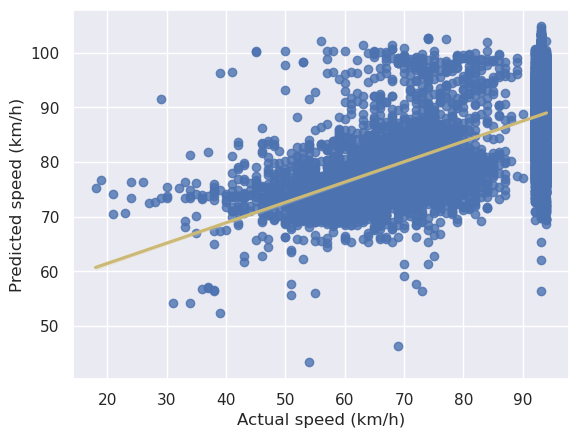

In [19]:
from sklearn.linear_model import LinearRegression

file_name = "041_linear_regression"
model_name = "Linear Regression"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, LinearRegression(), X_train, X_val, y_train, y_val, plot_label)

### Logistic Regression

Fitting model...
[W] [12:43:02.537232] L-BFGS stopped, because the line search failed to advance (step delta = 0.000000)
Fitting model... OK! Took 0.39428257942199707 seconds

model Logistic Regression
r2 -2.346571683883667
mae 20.26164436340332
mse 549.7703247070312
rmse 23.447181701660156
mape 0.23057148
time_to_fit 0.39428257942199707
time_to_predict 0.015126466751098633

Dumping model...
Dumping model... OK! Took 0.003595590591430664 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


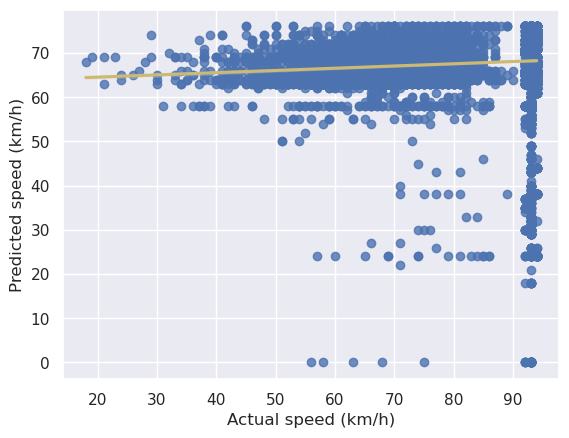

In [20]:
from sklearn.linear_model import LogisticRegression

file_name = "041_logistic_regression"
model_name = "Logistic Regression"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, LogisticRegression(), X_train, X_val, y_train, y_val, plot_label)

### Lasso

Fitting model...
Fitting model... OK! Took 0.03667330741882324 seconds

model Lasso
r2 0.3122618794441223
mae 7.877470970153809
mse 112.98069763183594
rmse 10.62923812866211
mape 0.10889959
time_to_fit 0.03667330741882324
time_to_predict 0.015019893646240234

Dumping model...
Dumping model... OK! Took 0.0021142959594726562 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


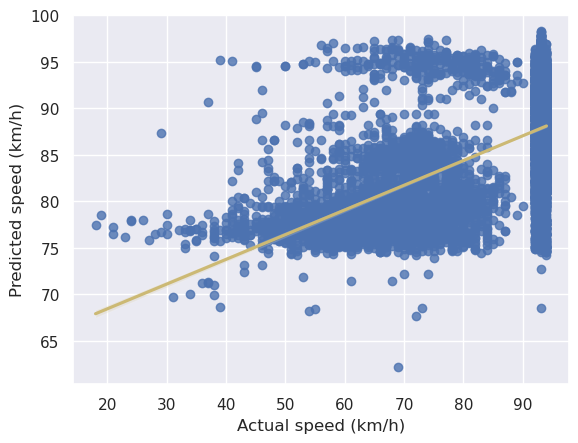

In [21]:
from sklearn.linear_model import Lasso

file_name = "041_lasso"
model_name = "Lasso"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, Lasso(), X_train, X_val, y_train, y_val, plot_label)

### Elastic Net

Fitting model...
Fitting model... OK! Took 0.03970527648925781 seconds

model Elastic Net
r2 0.3012953996658325
mae 8.070242881774902
mse 114.78225708007812
rmse 10.713647842407227
mape 0.11230001
time_to_fit 0.03970527648925781
time_to_predict 0.014185905456542969

Dumping model...
Dumping model... OK! Took 0.002088785171508789 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


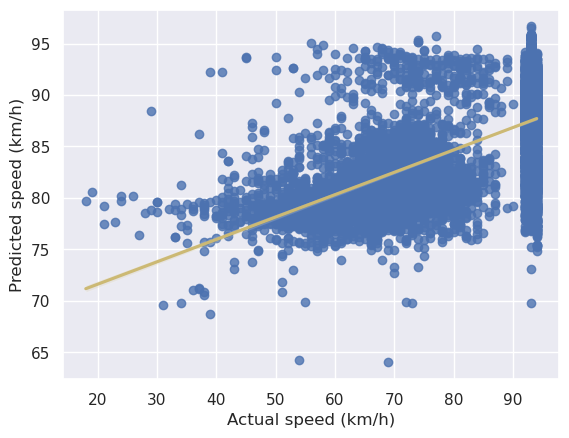

In [22]:
from sklearn.linear_model import ElasticNet

file_name = "041_elastic_net"
model_name = "Elastic Net"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, ElasticNet(), X_train, X_val, y_train, y_val, plot_label)

### Random Forest

Fitting model...
Fitting model... OK! Took 4.29456901550293 seconds

model Random Forest
r2 0.8841053247451782
mae 2.2155020236968994
mse 19.039020538330078
rmse 4.363372802734375
mape 0.030677881
time_to_fit 4.29456901550293
time_to_predict 0.30566978454589844

Dumping model...
Dumping model... OK! Took 3.308783531188965 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


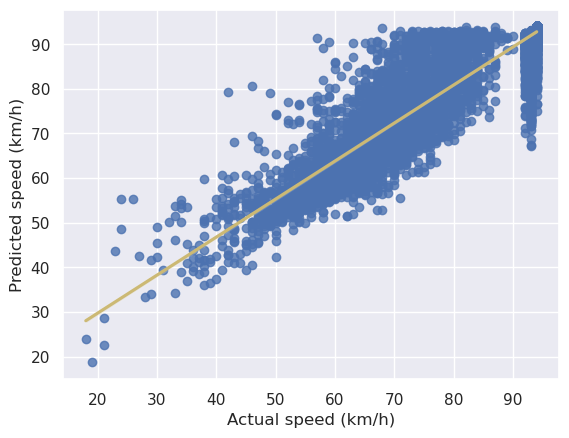

In [23]:
from sklearn.ensemble import RandomForestRegressor

file_name = "041_random_forest"
model_name = "Random Forest"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(), X_train, X_val, y_train, y_val, plot_label)

### Decision Tree

Fitting model...
Fitting model... OK! Took 0.38062596321105957 seconds

model Decision Tree
r2 0.8314932926200208
mae 1.8952879581151831
mse 27.682056163731556
rmse 5.261373980599703
mape 0.026607569796576146
time_to_fit 0.38062596321105957
time_to_predict 0.01009821891784668

Dumping model...
Dumping model... OK! Took 0.40003061294555664 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


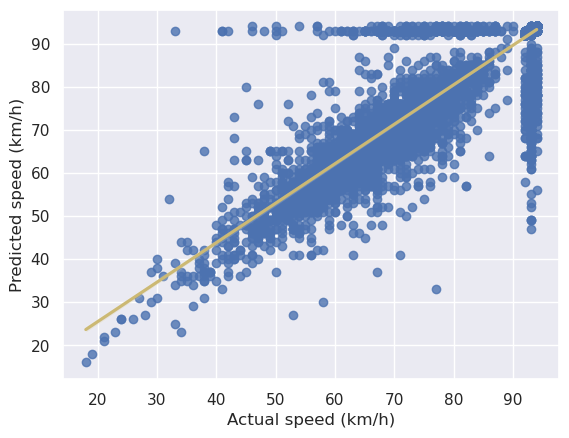

In [24]:
from sklearn.tree import DecisionTreeRegressor

file_name = "041_decision_tree"
model_name = "Decision Tree"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(), X_train, X_val, y_train, y_val, plot_label)

### XGBoost

Fitting model...
Fitting model... OK! Took 0.4489612579345703 seconds

model XGBoost
r2 0.839619310919219
mae 3.0049973
mse 26.347124
rmse 5.132945
mape 0.04058122
time_to_fit 0.4489612579345703
time_to_predict 0.017646312713623047

Dumping model...
Dumping model... OK! Took 0.06851482391357422 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


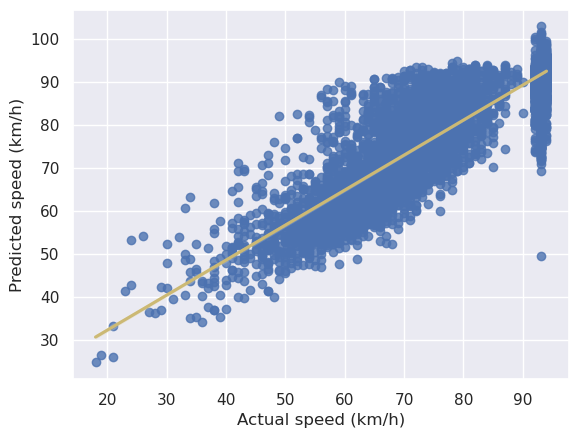

In [25]:
import xgboost as xgb

file_name = "041_xgboost"
model_name = "XGBoost"

xgb_params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**xgb_params), X_train, X_val, y_train, y_val, plot_label)

### MLP

Fitting model...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 62.34043788909912 seconds

model MLP
r2 0.6966255708971605
mae 4.588275
mse 49.837944
rmse 7.0595994
mape 0.061259087
time_to_fit 62.34043788909912
time_to_predict 0.02095317840576172

Dumping model...
Dumping model... OK! Took 0.009758949279785156 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


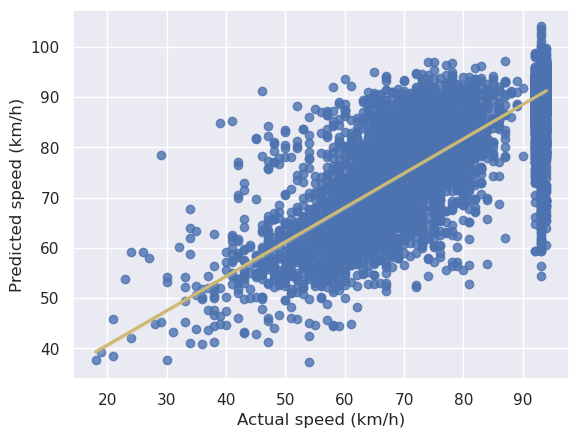

In [26]:
from sklearn.neural_network import MLPRegressor

file_name = "041_mlpr"
model_name = "MLP"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(), X_train, X_val, y_train, y_val, plot_label)